<a href="https://colab.research.google.com/github/harshan2k21/computer_vison/blob/main/otsu_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Otsu Threshold: 122.0


/tmp/ipython-input-3403216126.py:22: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0,256])


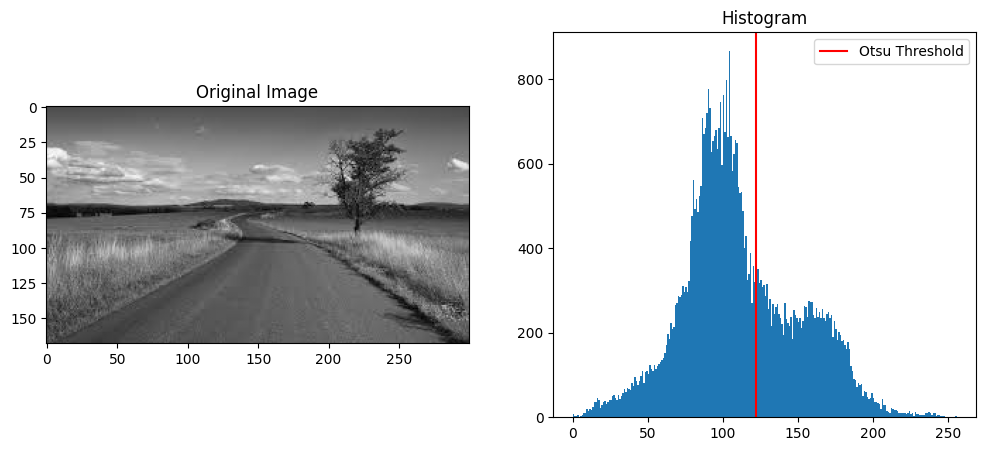

In [3]:


#1. Otsu Thresholding With Histogram Plot

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/image.jpeg", 0)

# Otsu Thresholding
ret, otsu_img = cv2.threshold(img, 0, 255,
                              cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print("Otsu Threshold:", ret)

# Histogram
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title("Histogram")
plt.hist(img.ravel(), 256, [0,256])
plt.axvline(ret, color='red', label="Otsu Threshold")
plt.legend()
plt.show()

Otsu Threshold After Blur: 123.0


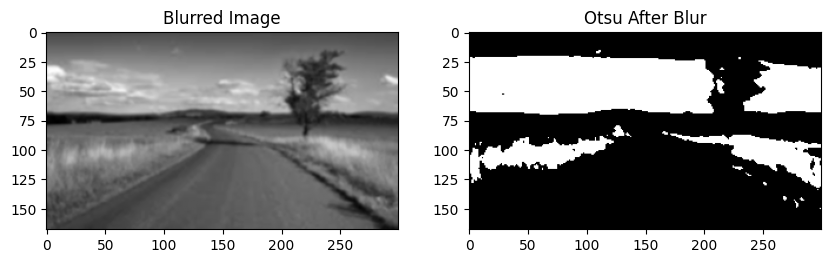

In [4]:
# 2. Otsu Thresholding After Gaussian Blur (Better Results)
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/image.jpeg", 0)

# Apply Gaussian Blur
blur = cv2.GaussianBlur(img, (5,5), 0)

# Otsu After Blurring
ret, otsu_blur = cv2.threshold(blur, 0, 255,
                               cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print("Otsu Threshold After Blur:", ret)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.title("Blurred Image"); plt.imshow(blur, cmap='gray')
plt.subplot(1,2,2); plt.title("Otsu After Blur"); plt.imshow(otsu_blur, cmap='gray')
plt.show()

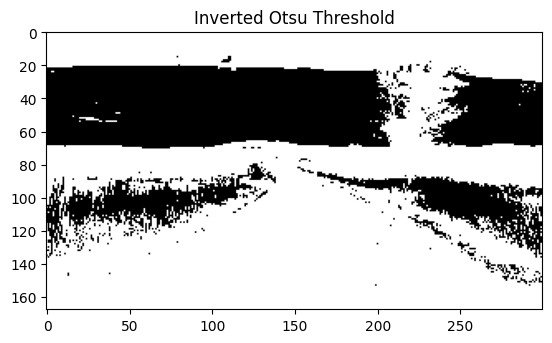

In [5]:
#3. Otsu Thresholding (Inverted Binary)
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/image.jpeg", 0)

ret, inv_otsu = cv2.threshold(
    img, 0, 255,
    cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)

plt.imshow(inv_otsu, cmap='gray')
plt.title("Inverted Otsu Threshold")
plt.show()

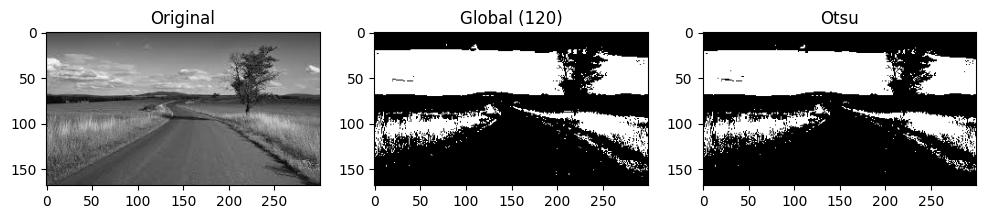

In [6]:
#4. Compare: Global Threshold vs Otsu
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/image.jpeg", 0)

# Manual Threshold (e.g., 120)
ret1, global_thresh = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)

# Otsu
ret2, otsu = cv2.threshold(img, 0, 255,
                            cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.title("Original"); plt.imshow(img, cmap='gray')
plt.subplot(1,3,2); plt.title("Global (120)"); plt.imshow(global_thresh, cmap='gray')
plt.subplot(1,3,3); plt.title("Otsu"); plt.imshow(otsu, cmap='gray')
plt.show()

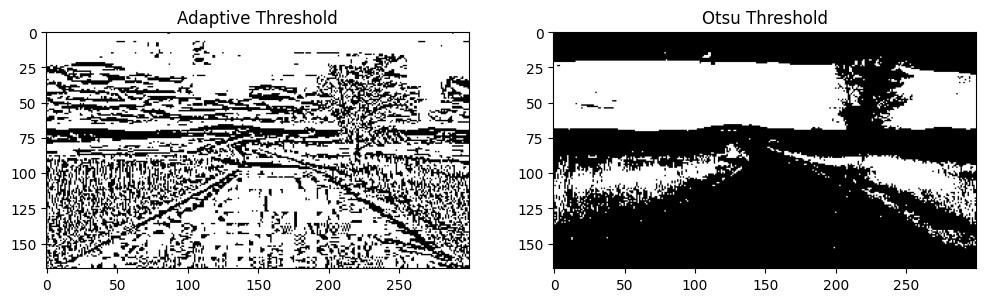

In [7]:
#5. Adaptive Threshold vs Otsu
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/image.jpeg", 0)

# Adaptive Threshold
adaptive = cv2.adaptiveThreshold(img, 255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY,
                                 11, 2)

# Otsu Threshold
ret, otsu = cv2.threshold(img, 0, 255,
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.title("Adaptive Threshold"); plt.imshow(adaptive, cmap='gray')
plt.subplot(1,2,2); plt.title("Otsu Threshold"); plt.imshow(otsu, cmap='gray')
plt.show()

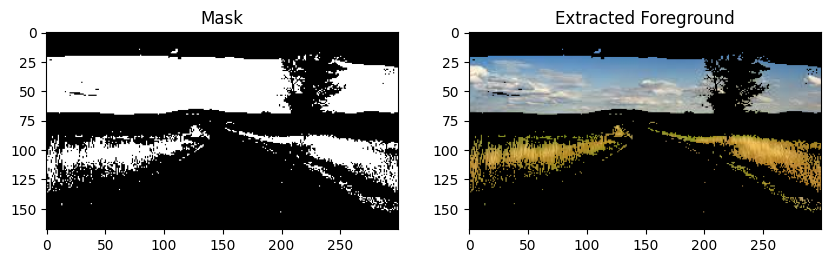

In [8]:
# 6. Extract Only Foreground Using Otsu Mask
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/image.jpeg", 0)
color = cv2.imread("/content/image.jpeg")

# Otsu mask
ret, mask = cv2.threshold(img, 0, 255,
                          cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply mask
foreground = cv2.bitwise_and(color, color, mask=mask)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.title("Mask"); plt.imshow(mask, cmap='gray')
plt.subplot(1,2,2); plt.title("Extracted Foreground"); plt.imshow(foreground[...,::-1])
plt.show()

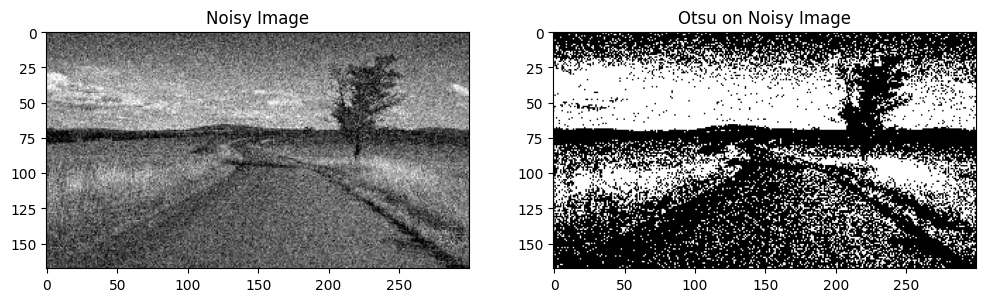

In [9]:
# 7. Otsu Thresholding on Noisy Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/image.jpeg", 0)

# Add Gaussian Noise
noise = img + np.random.normal(0, 25, img.shape)
noise = np.clip(noise, 0, 255).astype(np.uint8)

# Otsu
ret, otsu_noisy = cv2.threshold(noise, 0, 255,
                                cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.title("Noisy Image"); plt.imshow(noise, cmap='gray')
plt.subplot(1,2,2); plt.title("Otsu on Noisy Image"); plt.imshow(otsu_noisy, cmap='gray')
plt.show()